In [1]:
%matplotlib inline

C:\Users\James\Anaconda3\lib\site-packages\pysal\__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


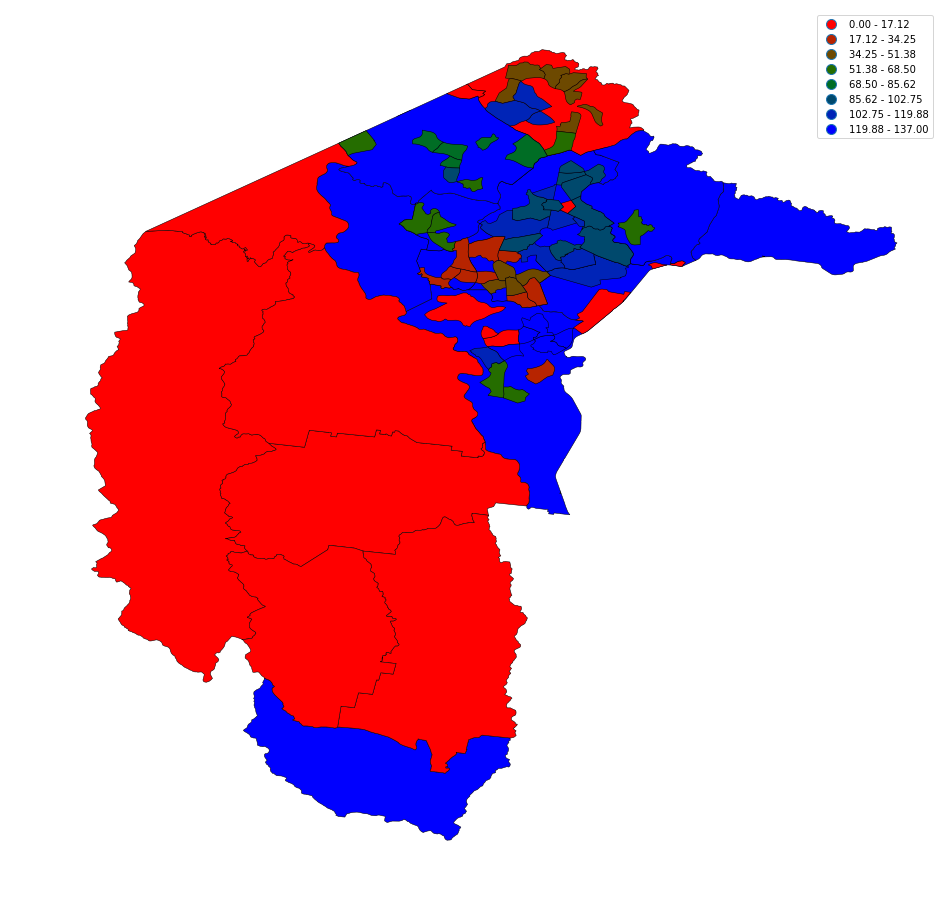

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
from tkinter import filedialog as fd
from tkinter import messagebox as mb
from tkinter import *

PADX = 4
PADY = 2

###############SETTINGS###############

def set_settings():
    
    global groups
    global map_size
    global column
    global edgecolor
    global linewidth
    
    for i in range(len(entry_boxes)-1):
        if entry_boxes[i].get() == "":
            mb.showinfo("Error", "Please fill in all boxes")
            return False
        
    groups = int(entry_boxes[2].get())
    mape_size = eval(entry_boxes[3].get())
    column = entry_boxes[4].get()
    edgecolor = entry_boxes[5].get()
    linewidth = float(entry_boxes[6].get())
    return True
    
def ask_filename():
    global fp
    fp = fd.askopenfilename()
    entry_boxes[0].insert(0,fp)

fp =            ""#"ACT_LOCALITY_POLYGON_shp/ACT_LOCALITY_POLYGON_shp.shp"
custom_cmap =   matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])
groups =        6
map_size =      (16,16)
column =        'LC_PLY_PID'
edgecolor =     'black'
linewidth =     1
###############SETTINGS###############
    
    
    
#####################MAP#########
def create_map():
    
    if set_settings():
        act_map = gpd.read_file(fp)
        act_map.head()
        f, ax = plt.subplots(1, figsize=map_size)
        ax = act_map.plot(column=column ,cmap=custom_cmap, ax=ax, linewidth=linewidth, edgecolor=edgecolor,scheme='equal_interval',k = groups, legend=True)
        ax.set_axis_off()
        plt.show()
####################MAP#########
    
    
    
########################GUI##############    
master = Tk()

labels = 'Filepath (.shp)', 'Colours', 'Groups', 'Size', 'Column of Data', 'Line Colour', 'Line Width'

entry_boxes = []

for i in range(len(labels)):
    Label(master, text=labels[i]).grid(row=i,column=1)
    entrybox = Entry(master)
    entrybox.grid(row=i,column=2,padx=PADX,pady=PADY)
    entry_boxes.append(entrybox)

Button(master, text="Browse", command=lambda: ask_filename()).grid(row=0, column=3,padx=PADX,pady=PADY)
Button(master, text="Create Map", command=lambda: create_map()).grid(row=len(labels), column=1,padx=PADX,pady=PADY)
    
mainloop()
########################GUI##############    
    
#get actual data for plotting and merge it into dataframe
#GUI

NameError: name 'act_map' is not defined